# Métodos de Adams-Bashfort

In [1]:
from numpy import *
from matplotlib.pyplot import *

In [24]:
# Metodo de Adams-Bashfort de 2a. ordem

def adams_bashfort_2nd_order(t0,tf,y0,h,fun):
    '''
    Resolve o PVI y' = f(t,y), t0 <= t <= b, y(t0)=y0
    usando a formula de Adams-Bashfort de ordem 2 
    com passo h. O metodo de Euler eh usado para 
    obter y1. A funcao f(t,y) deve ser definida 
    pelo usuario. 
  
    Saida: 
  
    A rotina AB2 retorna dois vetores, t e y,  
    contendo, nesta orde, os pontos nodais e 
    a solucao numerica. 
    '''

    # malha numerica  
    n = np.round((tf - t0)/h) + 1
    t = np.linspace(t0,t0+(n-1)*h,n)
    y = np.zeros(n)

    y[0] = y0 # condicao inicial 

    f1 = fun(t[0],y[0]) # f(t_i,y_i)
    y[1] = y[0] + h*f1 # Euler 

    for i in range(2,n):
        f2 = fun(t[i-1],y[i-1]) # f(t_i-1,y_i-1)
        y[i] = y[i-1] + h*(3*f2 - f1)/2 # esquema AB2
        f1 = f2 # atualiza 
        
    return t,y


def tab_erro_rel(t,y_n,y_e):

    # erro relativo
    e_r = abs(y_n - y_e)/abs(y_e)

    print('i \t t \t y_ex \t y_num \t e_r')
    for i in range(len(e_r)): 
        
        if i % 10 == 0:
            print('{0:d} \t {1:f} \t {2:f} \t {3:f} \t {4:e} \n'.format(i,t[i],y_e[i],y_n[i],e_r[i]))
            
def plot_fig(t,y_n,y_e,h):    
    plot(t,y_e,'r-')
    plot(t,y_n,'bo')
    title('Adams-Bashfort, 2a. ordem: $h=' + str(h) + '$')
    legend(['$y_{exata}$','$y_{num}$'])


**Exemplo:** Use o esquema de Adams-Bashfort de 2a. ordem para resolver o PVI. 

$$\begin{cases}
y'(t) = -y(t) + 2 \cos(t) \\
y(0) = 1 \\
0 \le t \le 18 \\ 
\end{cases}$$

_Solução exata_: $y(t) = {\rm sen}(t) + \cos(t)$

i 	 t 	 y_ex 	 y_num 	 e_r
0 	 0.000000 	 1.000000 	 1.000000 	 0.000000e+00 

10 	 5.000000 	 -0.675262 	 -0.670163 	 7.550607e-03 

20 	 10.000000 	 -1.383093 	 -1.477388 	 6.817733e-02 

30 	 15.000000 	 -0.109400 	 -0.167908 	 5.348066e-01 



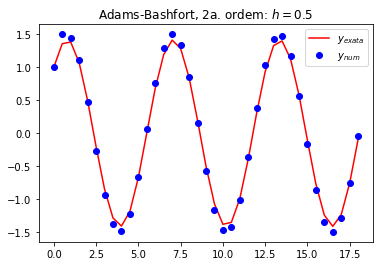

In [32]:
# define funcao
f = lambda t,y: -y + 2*cos(t)

# parametros
t0 = 0.0
tf = 18.0
y0 = 1.0
h = 0.5

# solucao numerica 
t,y_num = adams_bashfort_2nd_order(t0,tf,y0,h,f)
    
# solucao exata 
y_ex = sin(t) + cos(t)

plot_fig(t,y_num,y_ex,h)

tab_erro_rel(t,y_num,y_ex)

i 	 t 	 y_ex 	 y_num 	 e_r
0 	 0.000000 	 1.000000 	 1.000000 	 0.000000e+00 

10 	 1.000000 	 1.381773 	 1.384518 	 1.986208e-03 

20 	 2.000000 	 0.493151 	 0.491752 	 2.835038e-03 

30 	 3.000000 	 -0.848872 	 -0.852907 	 4.752486e-03 

40 	 4.000000 	 -1.410446 	 -1.413326 	 2.041670e-03 

50 	 5.000000 	 -0.675262 	 -0.674309 	 1.410789e-03 

60 	 6.000000 	 0.680755 	 0.684675 	 5.758689e-03 

70 	 7.000000 	 1.410889 	 1.414177 	 2.330243e-03 

80 	 8.000000 	 0.843858 	 0.843492 	 4.337392e-04 

90 	 9.000000 	 -0.499012 	 -0.502694 	 7.379922e-03 

100 	 10.000000 	 -1.383093 	 -1.386706 	 2.612468e-03 

110 	 11.000000 	 -0.995565 	 -0.995786 	 2.227766e-04 

120 	 12.000000 	 0.307281 	 0.310655 	 1.097903e-02 

130 	 13.000000 	 1.327614 	 1.331481 	 2.913030e-03 

140 	 14.000000 	 1.127345 	 1.128150 	 7.144782e-04 

150 	 15.000000 	 -0.109400 	 -0.112397 	 2.739478e-02 

160 	 16.000000 	 -1.245563 	 -1.249607 	 3.246745e-03 

170 	 17.000000 	 -1.236561 	 -1.237934 	 1

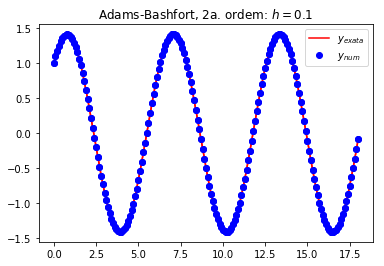

In [33]:
h = 0.1

# solucao numerica 
t,y_num = adams_bashfort_2nd_order(t0,tf,y0,h,f)
    
# solucao exata 
y_ex = sin(t) + cos(t)

plot(t,y_ex,'r-')
plot(t,y_num,'bo')
title('Adams-Bashfort, 2a. ordem: $h=0.5$')
legend(['$y_{exata}$','$y_{num}$'])

tab_erro_rel(t,y_num,y_ex)

plot_fig(t,y_num,y_ex,h)

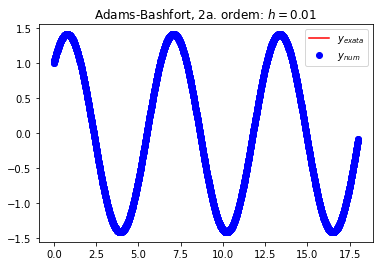

In [34]:
h = 0.01

# solucao numerica 
t,y_num = adams_bashfort_2nd_order(t0,tf,y0,h,f)
    
# solucao exata 
y_ex = sin(t) + cos(t)

plot(t,y_ex,'r-')
plot(t,y_num,'bo')
title('Adams-Bashfort, 2a. ordem: $h=0.1$')
legend(['$y_{exata}$','$y_{num}$'])

#tab_erro_rel(t,y_num,y_ex)

plot_fig(t,y_num,y_ex,h)